In [1]:
import numpy as np
import cv2
import tensorflow as tf
import joblib
import matplotlib.pyplot as plt

In [2]:
def prepare(filepath):
    img_size = 64
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    img_array = img_array/255.0
    new_array = cv2.resize(img_array, (img_size, img_size))
    return new_array.reshape(-1, img_size, img_size, 1)

def prepare2(image_array):
    image_array = np.array(image_array)
    img_size = 64
    image_array = image_array/1.0
    new_array = cv2.resize(image_array, (img_size, img_size))
    return new_array.reshape(-1, img_size, img_size, 1)

def print_np_arr(image_array):
    np.set_printoptions(threshold=np.inf)
    print(image_array)
    
def array_swap(image_array):
    a = image_array
    b = np.where(a > 0.8, 0,1)
    b=b/1.0
    return b

def prediction_print(image_array, model):
    prediction = model.predict([image_array])
    #prediction_idx = np.argmax(prediction, axis=1)
    pred_flatten = prediction.flatten()
    #print(pred_flatten.argsort()[-3][::-1])
    #print(pred_flatten.shape)
    #print(pred_flatten)
    prediction_idx = np.argpartition(pred_flatten, -10)[-10:]
    print(prediction_idx)
    


In [18]:
X = joblib.load("X_images.sav")

In [3]:
#model = tf.keras.models.load_model("Kanji.model")
model = tf.keras.models.load_model("Kanji2.model")

model.summary()

Model: "Seq_01"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_01 (Conv2D)           (None, 60, 60, 32)        832       
_________________________________________________________________
maxpool2d_01 (MaxPooling2D)  (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_02 (Conv2D)           (None, 26, 26, 32)        25632     
_________________________________________________________________
maxpool2d_02 (MaxPooling2D)  (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_03 (Conv2D)           (None, 9, 9, 64)          51264     
_________________________________________________________________
maxpool2d_03 (MaxPooling2D)  (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_01 (Flatten)         (None, 1024)              0    

In [4]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite = converter.convert()

In [5]:
tflite_filename = 'kanji_model2_lite.tflite'
open(tflite_filename, 'wb').write(tflite)

4412256

In [6]:
test_kanji = prepare("kanji.png")
print(type(test_kanji))
print(test_kanji.shape)

test_kanji = array_swap(test_kanji)
#print_np_arr(test_kanji)
#print(test_kanji.shape)

<class 'numpy.ndarray'>
(1, 64, 64, 1)


(64, 64)


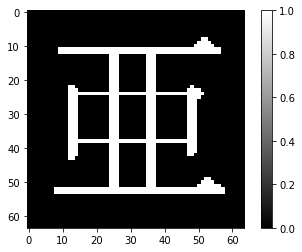

In [7]:
test_img = np.reshape(test_kanji, (64,64))
print(test_img.shape)
plt.imshow(test_img, cmap ="gray")
plt.colorbar()

In [8]:
prediction_print(test_kanji, model)

[ 223  733  189 1533 1480 1893 2314 1048 1654    0]


In [4]:
test_kanji2 = prepare("kanji3.png")
test_kanji2 = array_swap(test_kanji2)
#print_np_arr(test_kanji2)

(64, 64)


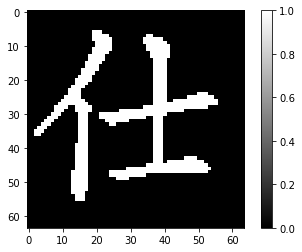

In [6]:
test_img2 = np.reshape(test_kanji2, (64,64))
print(test_img2.shape)
plt.imshow(test_img2, cmap ="gray")
plt.colorbar()

In [17]:
prediction_print(test_kanji2, model)

[2775  291 2464 2112 1371 1851 2779  663    5 2641]


<class 'numpy.ndarray'>
(64, 64)


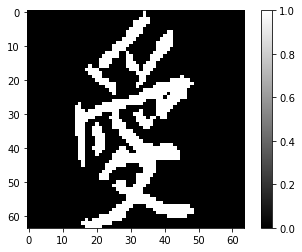

In [25]:
#preiction2 = model.predict([prepare2(X[0])])
kanji_test2 = prepare2(X[5])
print(type(kanji_test2))
kanji_test2.shape

test_img = np.reshape(kanji_test2, (64,64))
print(test_img.shape)
plt.imshow(test_img, cmap ="gray")
plt.colorbar()

In [26]:
prediction_print(prepare2(X[5]),model)

[1025  961 2310 2490  820 2367 2736  416 1212    5]


In [15]:
# 1 модель - kanji.model - показывает ну так себе, попадает в первую десятку


(64, 64, 1)


In [40]:
prediction2 = model.predict([prepare2(X[1429])])

In [41]:
prediction2.shape
prediction_idx = np.argmax(prediction2, axis=1)
print(prediction_idx)

[1429]


In [59]:
a = np.array([[1,2], [3,4]])
print(a.shape)
d = a.flatten()
print(d.shape)
#a.flatten('F')


(2, 2)
(4,)


In [64]:
arr = np.array([1, 3, 2, 4, 5])
arr.shape

(5,)